In [30]:
import torch
import torch.nn as nn
import torchvision
import torch.utils.data
import torchvision.transforms as transforms
import torch.optim
import torch.nn.functional as F


In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307), ((0.3081)))]) 

In [16]:
trainset = torchvision.datasets.MNIST('mnist', train=True,download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False,download=True, transform=transform)

# Prepare training loader and testing loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,shuffle=False, num_workers=0)

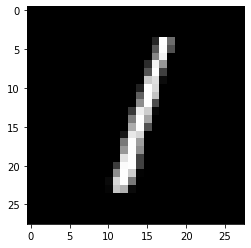

In [17]:
import matplotlib.pyplot as plt
plt.imshow(testloader.dataset.test_data[2], cmap='gray')

In [18]:
print(trainloader.dataset.train_data.shape,testloader.dataset.test_data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [19]:
# Define the class Net
class Net(nn.Module):
    def __init__(self):    
        # Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 200)
        self.fc2 = nn.Linear(200,10)

    def forward(self, x):   
        # Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [31]:
model = Net()   
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
  
for batch_idx, data_target in enumerate(trainloader):
    data = data_target[0]
    target = data_target[1]
    data = data.view(-1, 28 * 28)
    optimizer.zero_grad()

    # forward propagation
    output = model(data)

    # Compute the loss, gradients and change the weights
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()

In [37]:
# Set the model in eval mode
model.eval()
total,correct=0,0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1, 28*28)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))


The testing set accuracy of the network is: 95 %
